In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Gradient Descent With Linear Regression
$$y = wx + b$$
$$noisy\_y = y + \epsilon$$
$$\hat{y} = \theta_0x + \theta_1$$
Our Goal is to learn the hyperparameters w, and b such that we minimize our loss function:
$$J_\theta(noisy\_y) = \sum(noisy\_y - \hat{y})^2$$

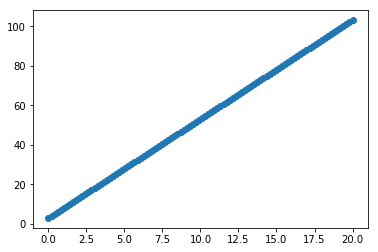

In [2]:
# First let's define x, y, w, b
x = np.linspace(0, 20, 100)
w = 5
b = 3
y = (w*x + b)

plt.scatter(x, y)
plt.show()

In real world data however we have noise. For example, let's say we had you take a questionnaire twice. 
It could be the case that you put down different answers for the questionnaire the first time you took it
in comparison to the second time you took that. So while there may be some true y-result of what you actually
meant to put in the questionnaire, perhaps some noise due to your mood, whether you're hungry, and other external
factors caused you to add some noise to your answers leading you to put down 2 different results for the same
questionnaire.

For this reason statisticians and machine learning engineers cannot neglect the importance of noise! Instead of training on y, it would be a better real world example if we trained on a noisy y dataset. We define noisy_y to be the addition of some actual underlying label y which we do not observe, and some noise factor $\epsilon$ (epsilon) which we often normally distribute. 

noisy_y are the values of y which we actually observe within our data sets.
$$noisy\_y = y + \epsilon$$

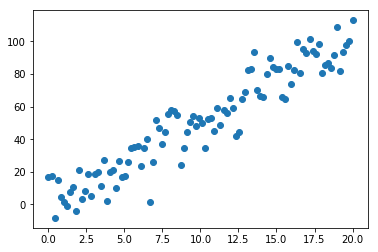

In [3]:
epsilon = np.random.normal(size=(100))*10 # normally distributed noise
noisy_y = y + epsilon

plt.scatter(x, noisy_y)
plt.show()

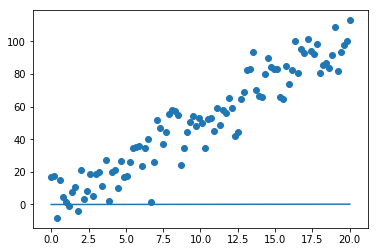

In [4]:
# Now let's define our theta parameters which we wish to learn, and our learning rate
theta = [0.01, -0.01]
learning_rate = 1e-4

# Let's define our loss function: sum((y-yhat)**2), and our hypothesis predict: theta[0] * x + theta[1]
def mean_squared_error(logits, label):
    return sum((label - (logits * theta[0] + theta[1]))**2)

def predict(x):
    return theta[0] * x + theta[1]

# Let's define the number of training iterations and a metric to record our loss
epochs = 25
historical_loss = []

# Now let's plot our current guess
plt.plot(x, predict(x))
plt.scatter(x, noisy_y)
plt.show()

The general Gradient Descent update rule is as follows:

$$\theta = \theta - \alpha\nabla_\theta{J}$$
We previously defined $\alpha$ as 1e-4, and theta as \[0.01, -0.01\]. Also recall that
$$J_\theta(noisy\_y) = \sum(noisy\_y - \hat{y})^2$$
and
$$\hat{y} = \theta_0x + \theta_1$$

Therefore our partial derivatives are as follows:
$$\nabla_{\theta_0}{J} = \sum((y - \hat{y}) / 2)(-x)$$
$$\nabla_{\theta_1}{J} = \sum((y - \hat{y}) / 2)(-1)$$

Estimated 5.1899594859850655x + 0.45920880346818677


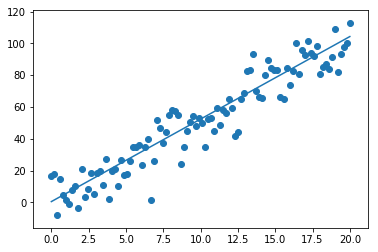

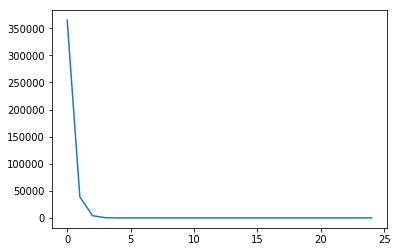

In [5]:
# Finally let's train
for i in range(epochs):
    historical_loss.append(mean_squared_error(x,y)) # record loss
    yhat = predict(x) # make our prediction
    theta[0] -= learning_rate * sum(((y - yhat)/2) * -x) # update theta[0] (our guess for w)
    theta[1] -= learning_rate * sum(((y - yhat)/2) * -1) # update theta[1] (our guess for b)
    
# Plot our regression
print('Estimated {0}x + {1}'.format(theta[0], theta[1]))
plt.plot(x, predict(x))
plt.scatter(x, noisy_y)
plt.show()

# Plot our loss function
plt.plot(historical_loss)
plt.show()

In [6]:
print(historical_loss[-1])

164.23944973791387
